# Computational Mathematics  <a class="tocSkip">

## Errors, verification & validation <a class="tocSkip">
    
### Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---$\ell^p$-norms" data-toc-modified-id="Homework---$\ell^p$-norms-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - $\ell^p$ norms</a></span></li><li><span><a href="#Homework---norms-in-linear-best-fit-[*]" data-toc-modified-id="Homework---norms-in-linear-best-fit-[*]-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - norms in linear best fit [*]</a></span></li><li><span><a href="#Homework---SymPy-and-the-logistic-ODE" data-toc-modified-id="Homework---SymPy-and-the-logistic-ODE-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - SymPy and the logistic ODE</a></span></li><li><span><a href="#Homework---round-off-vs-truncation-errors" data-toc-modified-id="Homework---round-off-vs-truncation-errors-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - round-off vs truncation errors</a></span></li><li><span><a href="#Homework---Vandermonde-matrices-[*]" data-toc-modified-id="Homework---Vandermonde-matrices-[*]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Vandermonde matrices [*]</a></span></li><li><span><a href="#Homework---ill-conditioned-matrices-and-the-solution-of-corresponding-linear-systems-[*]" data-toc-modified-id="Homework---ill-conditioned-matrices-and-the-solution-of-corresponding-linear-systems-[*]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - ill-conditioned matrices and the solution of corresponding linear systems [*]</a></span></li><li><span><a href="#Homework---Hilbert-matrix-[*]" data-toc-modified-id="Homework---Hilbert-matrix-[*]-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Hilbert matrix [*]</a></span></li></ul></li></ul></div>

In [2]:
%matplotlib inline
%precision 16
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl

# Homework

## Homework - $\ell^p$ norms

See <https://en.wikipedia.org/wiki/Sequence_space#%E2%84%93p_spaces>

Recall our vector norms from lecture

\begin{align*}
\|\boldsymbol{v}\,\|_2 & = \sqrt{v_1^2 + v_2^2 + \ldots + v_n^2} = \left(\sum_{i=1}^n v_i^2 \right)^{1/2}, &&{\text{the two-norm}}\\[5pt]
\|\boldsymbol{v}\,\|_1  & = |v_1| + |v_2| + \ldots + |v_n| = \sum_{i=1}^n |v_i|, &&{\text{the one-norm}}\\[5pt]
\|\boldsymbol{v}\,\|_{\infty}  &= \max\{|v_1|,|v_2|, \ldots, |v_n| = \max_{i=1}^n |v_i|, &&{\text{the max-norm}}
\end{align*}

we can generalise the "two-norm" to the "$p$-norm":

$$\|\boldsymbol{v}\,\|_p = \left(v_1^2 + v_2^2 + \ldots + v_n^2\right)^{1/p} 
= \left(\sum_{i=1}^n v_i^p \right)^{1/p}$$

Plot the unit circle in terms of this norm - what shapes does it recreate for $p=1$ and $p$ very large?

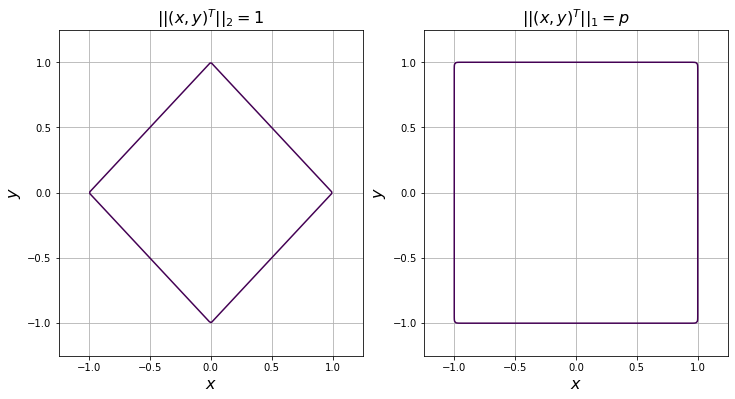

In [9]:
p=100
# define an x and y mesh spacing
x = np.linspace(-1.25, 1.25, 200)
y = x

# use meshgrid to expand these vectors to matrices
[X, Y] = np.meshgrid(x, y)

# initialise space to store the norm values over the (x,y) domain,
# i.e. these are matrices
p1_norm = np.zeros_like(X)
plarge_norm = np.zeros_like(X)

# loop over all points in our 2D space
for i in range(len(x)):
    for j in range(len(y)):
        # define the point as a vector of length 2
        op = np.array([x[i], y[j]])
        # compute and store the norm values
        p1_norm[i, j] = sl.norm(op, 1)
        plarge_norm[i, j] = sl.norm(op, p)

# we can now plot the "unit circles" using a contour plot where we only plot the unit contour:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)

ax1.contour(X, Y, p1_norm, levels = [1])
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('$|| (x,y)^T ||_{2} = 1$', fontsize=16)
ax1.grid(True)

ax2 = fig.add_subplot(122)

ax2.contour(X, Y, plarge_norm, levels = [1])
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('$|| (x,y)^T ||_{1} = p$', fontsize=16)
ax2.grid(True)

## Homework - norms in linear best fit [*]

Try updating the example from class so that the linear best fit line goes through the origin, i.e. you are optimising for the slope parameter only with each line going through the origin (the intercept is zero).


## Homework - SymPy and the logistic ODE


In lecture 1 we considered the logistic ODE

$$\frac{dx}{dt} = \alpha x(1-x), \qquad x(0)=x_0$$

and derived the following solution

$$x(t) = \frac{x_0}{x_0 + (1-x_0)e^{-\alpha t}}$$

Use SymPy to derive the same solution symbolically

In [10]:
def forward_euler(f, y0, t0, t_max, dt):
    """ Forward Euler time stepper
    f is the RHS function expected to be of the form f=f(t,y)
    """
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y) 
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

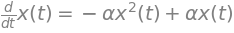

In [51]:
# import Python's symbolic math library
alpha = 2

import sympy as sym
# print maths nicely:
sym.init_printing()
# define the 'symbols' that will be our variables/parameters
t, x0, alpha = sym.symbols('t, x0, alpha')
# define a function - this will be the solution we're looking for
x = sym.Function('x')
# define this function's derivative with respect to t
dxdt = x(t).diff(t)
# define the ODE - see https://docs.sympy.org/latest/tutorial/gotchas.html#tutorial-gotchas-equals
ode_expr = sym.Eq(dxdt, (alpha * x(t)) - (alpha * (x(t)**2))) 
# print it out to check it's correct
ode_expr

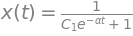

In [52]:
# solve the ODE symbolically
ode_sol = sym.dsolve(ode_expr, x(t))
ode_sol

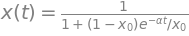

In [53]:
# above included a constant of integeration C_1, 
# we can specify this in the solve so we don't need to work it our separately
ode_sol = sym.dsolve(ode_expr, x(t), ics={x(0):x0})
ode_sol

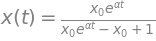

In [54]:
sym.simplify(ode_sol)

In [55]:
ode_sol_fun = sym.lambdify(t, ode_sol.rhs)

TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable exp method

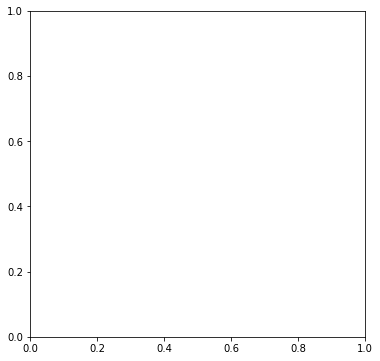

In [56]:
# now plot the solution using the function we just generated
x0 = 0.5
alpha = 1.
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)

t = np.arange(0.1, 10, 0.1)
ax1.plot(t, ode_sol_fun(t), 'b', label='SymPy solution')

ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_title('SymPy solution', fontsize = 16)
ax1.legend(loc='best', fontsize = 14)

## Homework - round-off vs truncation errors

Given a function $f(x)$, a Taylor series analysis tells us that the following is a first-order approximation to its derivative:

$$f'(x) \approx \frac{f(x+\Delta x) - f(x)}{\Delta x} $$

Of course this is just the finite version of the mathematics you used to first learn about what a derivative is:

$$f'(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x)}{\Delta x} $$

Code up this approximation and plot the error as a function of $\Delta x$, and see what happens as we vary $\Delta x$ from very large to very small values (make sure you don't go to extreme with these as you might experience overflow!)

You could test with the function $f(x) = \exp(x)$ at $x=1$ say, but other examples should show similar results.

## Homework - Vandermonde matrices [*]

We will see in a later lecture how polynomial interpolation using a monomial basis involves the solution of a linear system with a so-called [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).

A potential issue is that Vandermonde matrices are known to be ill-conditioned.

Assume that we are dealing with a square matrix, write some code to construct the Vandermonde matrix given a vector of $\alpha$ values. You can check your code against `np.vander`.

Investigate how the condition number of the matrix varies for a uniform mesh of data points in $x$ (i.e. `alpha = np.linspace(0, 1, n)` as a function of the number of points in the mesh (`n`).


## Homework - ill-conditioned matrices and the solution of corresponding linear systems [*]

Consider the problem from the lecture

$$
\left(
  \begin{array}{cc}
    2 & 1 \\
    2 & 1 + \epsilon  \\
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y \\
  \end{array}
\right) = \left(
  \begin{array}{c}
    3 \\
    0 \\
  \end{array}
\right)
$$

and let's consider the case where $\epsilon = 0.1$.

Consider the two extreme points we computed from class that corresponded to the magenta and black dots in our plots

```Python
A = np.array([[2.,1.],[2.,1. + 0.1]])

# these are the points we computed from class
origin_p = np.array([2.235621,2.282122])
origin_p2 = np.array([-0.044721,0.04381])
```

construct a small (I used a perturbation size of magnitude 0.01) circle of points around each of these - consider these as perturbed RHS $\boldsymbol{b}$ values. 

Compute and plot the corresponding shape you get for the set of perturbed solutions $\boldsymbol{x}$.

Compute the maximum value of the ratio of the relative perturbation in $x$ to the relative perturbation in $b$:

$$\frac{  {\|\delta \boldsymbol{x}\|} / {\|\boldsymbol{x}\|}   }{  {\|\delta \boldsymbol{b}\|} / {\|\boldsymbol{b}\|}    } $$

for each case and convince yourself that for both this quantity is bounded by the condition number as the theory implies.

## Homework - Hilbert matrix [*]

The *Hilbert matrix* is a classic example of ill-conditioned (square) matrix:

$$
A = 
  \begin{pmatrix}
    1      & 1/2    & 1/3    & \cdots \\
    1/2    & 1/3    & 1/4    & \cdots \\
    1/3    & 1/4    & 1/5    & \cdots \\
    \vdots & \vdots & \vdots & \ddots  \\
\end{pmatrix}\,.
$$

Let's consider the linear system $A\boldsymbol{x}=\boldsymbol{b}$ where the RHS vector is defined as

$$ b_i = \sum_{j=1}^n a_{ij},\;\;\; \text{for}\;\;\;\; i=1,2,\ldots, n.$$


- Think about how you can write entry $a_{ij}$ for any $i$ and $j$ mathematically, and use this to write a function that generated the Hilbert matrix for a given $n$.


- Convince yourself that $ \boldsymbol{x} = \left[ 1, 1, \cdots 1\right]^T$ is the exact solution of the system.


- Write a function that returns $A$ and $b$ for a given $n$.


- For a range of $n$, compute the condition number of $A$, solve the linear system and compute the error between the NumPy/SciPy solution you obtain and the exact solution.  How does the error vary with $n$?

<br>

**Notes**

For this example we do not need to introduce any explicit perturbations in our problem in order to generate errors in our solution.

We can interpret the exact mathematical problem as written down above as the unperturbed case with the unperturbed exact solution being $ \boldsymbol{x} = \left[ 1, 1, \cdots 1\right]^T$.

Floating point errors will mean that every case we consider numerically will be perturbed slightly - both the entries of $A$ and $\boldsymbol{b}$ won't be exactly as they should be. With finite precision arithmetic our calculations can only be as accurate as [*machine epsilon*](https://en.wikipedia.org/wiki/Machine_epsilon) which assuming double precision is given by

```Python
print('machine epsilon = ', np.finfo(float).eps)
machine epsilon =  2.220446049250313e-16
```
The relation 

$$ \text{relative error of output}  \sim  \text{condition number} \times  \text{relative error of input} $$

therefore gives us an upper bound on how accurate we can expect our solution to be:

$$ \text{relative error of output}  \sim  \text{condition number} \times  \text{machine epsilon}. $$

Add this relation to your relative error plot and check it indeed provides an upper bound, which grows with $n$, and that our relative error is close to this value and grows in tandem with it as $n$ increases.

This emphasises the point that for ill-conditioned problems large errors can be expected even if only floating point errors are present.

In [ ]:
a = 1/3
print(a)
print('{:.16f}'.format(a))
print('{:.17f}'.format(a))
print('{:.20f}'.format(a))
b = 100000*a - 33333
print(b)
print(3*b)